# Baseline

## Set-up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

## Data
We generate a dataset with the minimum and standard deviation of a given instance of activity as our two features for the baseline, using a 70/30 train/test split.

In [2]:
data = np.genfromtxt('data.csv', delimiter=',', skip_header=True, dtype=np.int16)[:, 1:]

n = data.shape[0]
d = data.shape[1] - 1

X = np.concatenate((np.amin(data[:, :d], axis=1).reshape(n, 1), np.std(data[:, :d], axis=1).reshape(n, 1)), axis=1)
y = data[:, d]  # == 1 for binary classification task
classes = np.unique(y)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Models

We evaluate with accuracy and F1 score.

In [4]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = clf.score(X_test, y_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_per_class = f1_score(y_test, y_pred, average=None, labels=classes)

print('Acc:', acc)
print('Macro F1:', f1_macro)
print('F1 Score by Class:', f1_per_class)

Acc: 0.45304347826086955
Macro F1: 0.44690820915113266
F1 Score by Class: [0.9082774  0.23043852 0.21068473 0.43692308 0.44821732]


We plot the points.

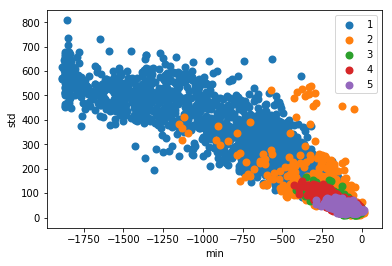

In [5]:
plt.figure()
for c in classes:
    plt.scatter(X[y == c, -2], X[y == c, -1], linewidth=2, label=str(c))
plt.xlabel('min')
plt.ylabel('std')
plt.legend()
plt.show()